In [24]:
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import warnings
import matplotlib

In [2]:
warnings.filterwarnings('ignore')

## Data

In [21]:
#specifing paths where xls files are located
path = 'Price_data'
all_files = glob.glob(path + "/*.xls")

for filename in all_files:
    file = pd.read_html(filename)
    df = pd.DataFrame(file[0])
    df['Price Date'] = pd.to_datetime(df['Price Date'])
    df['month_and_year'] = pd.to_datetime(df['Price Date']).dt.to_period('M')
    df['year'] = pd.DatetimeIndex(df['Price Date']).year
    data = df.groupby(['month_and_year','District Name','Market Name','Commodity','Variety'],as_index=False).mean()
    data.drop('Sl no.',axis=1,inplace = True)
    file_name = data['District Name'][0]+'_'+data['Commodity'][0]
    data.to_csv(file_name,index=False)

In [41]:
#making dataframe of each district and each crop separatly to build forcasting model
csv_path = 'Price_data_csvfiles'
all_csv_files = glob.glob(csv_path + '/*')

for i in all_csv_files:
    df = pd.read_csv(i)
    print(df['District Name'][0]  + df['Commodity'][0])
    display(df)
    vars()[df['District Name'][0] +"_"+ df['Commodity'][0]] = df
    

BangaloreCoconut


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2001-12,Bangalore,Bangalore,Coconut,Other,2000.000000,5000.000000,3500.000000,2001.0
1,2002-01,Bangalore,Bangalore,Coconut,Grade-I,2000.000000,5250.000000,3625.000000,2002.0
2,2002-02,Bangalore,Bangalore,Coconut,Grade-I,2000.000000,5500.000000,3750.000000,2002.0
3,2002-03,Bangalore,Bangalore,Coconut,Grade-I,1783.333333,4983.333333,3383.333333,2002.0
4,2002-04,Bangalore,Bangalore,Coconut,Grade-I,1682.608696,5130.434783,3439.130435,2002.0
...,...,...,...,...,...,...,...,...,...
199,2020-10,Bangalore,Bangalore,Coconut,Grade-I,12333.333333,22380.952381,17357.142857,2020.0
200,2020-11,Bangalore,Bangalore,Coconut,Grade-I,14545.454545,23181.818182,18863.636364,2020.0
201,2020-12,Bangalore,Bangalore,Coconut,Grade-I,16363.636364,30000.000000,23181.818182,2020.0
202,2021-01,Bangalore,Bangalore,Coconut,Grade-I,18863.636364,30000.000000,24431.818182,2021.0


BangaloreMaize


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2001-07,Bangalore,Bangalore,Maize,Deshi Red,440.000000,480.000000,460.000000,2001.0
1,2001-09,Bangalore,Bangalore,Maize,Local,510.000000,550.000000,530.000000,2001.0
2,2001-10,Bangalore,Bangalore,Maize,Local,510.000000,550.000000,530.000000,2001.0
3,2001-11,Bangalore,Bangalore,Maize,Other,480.000000,500.000000,490.000000,2001.0
4,2001-12,Bangalore,Bangalore,Maize,Deshi Red,450.000000,480.000000,465.000000,2001.0
...,...,...,...,...,...,...,...,...,...
228,2020-10,Bangalore,Bangalore,Maize,Hybrid/Local,1463.636364,1663.636364,1563.636364,2020.0
229,2020-11,Bangalore,Bangalore,Maize,Hybrid/Local,1509.090909,1740.909091,1625.000000,2020.0
230,2020-12,Bangalore,Bangalore,Maize,Hybrid/Local,1500.000000,1700.000000,1600.000000,2020.0
231,2021-01,Bangalore,Bangalore,Maize,Hybrid/Local,1540.909091,1759.090909,1650.000000,2021.0


BangaloreRice


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2001-08,Bangalore,Bangalore,Rice,Coarse,1020.000000,1120.000000,1070.000000,2001.0
1,2001-08,Bangalore,Bangalore,Rice,Fine,1690.000000,1800.000000,1745.000000,2001.0
2,2001-08,Bangalore,Bangalore,Rice,Medium,1450.000000,1540.000000,1500.000000,2001.0
3,2001-09,Bangalore,Bangalore,Rice,Coarse,950.000000,1150.000000,1050.000000,2001.0
4,2001-09,Bangalore,Bangalore,Rice,Fine,1725.000000,1825.000000,875.000000,2001.0
...,...,...,...,...,...,...,...,...,...
433,2020-10,Bangalore,Bangalore,Rice,Medium,4271.428571,4652.380952,4461.904762,2020.0
434,2020-11,Bangalore,Bangalore,Rice,Medium,3331.818182,4290.909091,3872.727273,2020.0
435,2020-12,Bangalore,Bangalore,Rice,Medium,4000.000000,4400.000000,4200.000000,2020.0
436,2021-01,Bangalore,Bangalore,Rice,Medium,4000.000000,4400.000000,4200.000000,2021.0


BidarMaize


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2004-12,Bidar,Bidar,Maize,Hybrid/Local,505.000000,515.000000,515.000000,2004.0
1,2008-11,Bidar,Bidar,Maize,Hybrid/Local,751.857143,770.285714,759.571429,2008.0
2,2009-07,Bidar,Bidar,Maize,Hybrid/Local,745.000000,745.000000,745.000000,2009.0
3,2009-12,Bidar,Bidar,Maize,Local,806.000000,950.000000,806.000000,2009.0
4,2010-01,Bidar,Bidar,Maize,Local,850.000000,850.000000,850.000000,2010.0
5,2010-05,Bidar,Bidar,Maize,Local,796.500000,796.500000,796.500000,2010.0
6,2010-06,Bidar,Bidar,Maize,Local,936.000000,936.000000,936.000000,2010.0
7,2010-12,Bidar,Bidar,Maize,Local,815.000000,860.000000,815.000000,2010.0
8,2011-09,Bidar,Bidar,Maize,Local,2000.000000,3540.000000,3000.000000,2011.0
9,2011-11,Bidar,Bidar,Maize,Local,931.909091,934.636364,932.818182,2011.0


BidarRice


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2002-04,Bidar,Bidar,Rice,Coarse,664.687500,1049.375000,967.187500,2002.0
1,2002-04,Bidar,Bidar,Rice,Dosa Rice,772.941176,1365.941176,1282.058824,2002.0
2,2002-05,Bidar,Bidar,Rice,Coarse,830.625000,1573.125000,1472.687500,2002.0
3,2002-05,Bidar,Bidar,Rice,Dosa Rice,614.687500,906.250000,810.937500,2002.0
4,2002-06,Bidar,Bidar,Rice,Broken Rice,611.363636,927.272727,815.909091,2002.0
...,...,...,...,...,...,...,...,...,...
474,2020-12,Bidar,Bidar,Rice,CR 1009 (Coarse) Boiled,3853.333333,5226.666667,4500.000000,2020.0
475,2021-01,Bidar,Bidar,Rice,Broken Rice,2289.473684,2742.105263,2513.157895,2021.0
476,2021-01,Bidar,Bidar,Rice,CR 1009 (Coarse) Boiled,3815.000000,5255.000000,4402.500000,2021.0
477,2021-02,Bidar,Bidar,Rice,Broken Rice,2223.684211,2644.736842,2436.842105,2021.0


DavangereCoconut


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2002-01,Davangere,Davangere,Coconut,Grade-I,3360.869565,4465.217391,3904.347826,2002.0
1,2002-02,Davangere,Davangere,Coconut,Grade-I,2838.095238,4297.619048,3623.809524,2002.0
2,2002-03,Davangere,Davangere,Coconut,Grade-I,2411.764706,4167.647059,3452.941176,2002.0
3,2002-04,Davangere,Davangere,Coconut,Coconut,2300.000000,4473.333333,3566.666667,2002.0
4,2002-04,Davangere,Davangere,Coconut,Grade-I,2326.315789,4486.842105,3597.368421,2002.0
...,...,...,...,...,...,...,...,...,...
204,2020-09,Davangere,Davangere,Coconut,Grade-I,8000.000000,9916.666667,9041.666667,2020.0
205,2020-10,Davangere,Davangere,Coconut,Grade-I,8500.000000,8500.000000,8500.000000,2020.0
206,2020-11,Davangere,Davangere,Coconut,Grade-I,10666.666667,17333.333333,14666.666667,2020.0
207,2020-12,Davangere,Davangere,Coconut,Grade-I,9500.000000,12500.000000,11000.000000,2020.0


DavangereMaize


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2002-01,Davangere,Davangere,Maize,Local,445.434783,461.782609,455.260870,2002.0
1,2002-02,Davangere,Davangere,Maize,Local,471.428571,488.523810,481.904762,2002.0
2,2002-03,Davangere,Davangere,Maize,Local,500.555556,525.277778,517.444444,2002.0
3,2002-04,Davangere,Davangere,Maize,Local,508.863636,526.772727,518.454545,2002.0
4,2002-05,Davangere,Davangere,Maize,Local,487.619048,511.095238,500.904762,2002.0
...,...,...,...,...,...,...,...,...,...
223,2020-10,Davangere,Davangere,Maize,Local,1077.000000,1336.000000,1203.000000,2020.0
224,2020-11,Davangere,Davangere,Maize,Local,1209.904762,1432.190476,1331.190476,2020.0
225,2020-12,Davangere,Davangere,Maize,Local,1341.190476,1426.190476,1382.380952,2020.0
226,2021-01,Davangere,Davangere,Maize,Local,1330.681818,1436.590909,1383.863636,2021.0


DavangerePaddy(Dhan)(Common)


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2002-01,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Coarse,530.608696,577.826087,554.391304,2002.0
1,2002-01,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Medium,655.363636,718.590909,688.227273,2002.0
2,2002-02,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Coarse,530.157895,586.368421,563.052632,2002.0
3,2002-02,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Medium,737.500000,793.700000,765.000000,2002.0
4,2002-03,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Coarse,499.187500,582.125000,559.187500,2002.0
...,...,...,...,...,...,...,...,...,...
574,2020-11,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Medium,1499.500000,2020.590909,1739.772727,2020.0
575,2020-12,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Medium,1505.952381,2356.666667,1923.238095,2020.0
576,2021-01,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Coarse,1330.000000,1410.000000,1370.000000,2021.0
577,2021-01,Davangere,Davangere,Paddy(Dhan)(Common),Paddy Medium,1722.666667,2089.285714,1900.285714,2021.0


MysoreCoconut


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2002-04,Mysore,K.R.Nagar,Coconut,Grade-III,3000.0,3000.0,3000.0,2002.0
1,2002-05,Mysore,K.R.Nagar,Coconut,Medium,3000.0,3000.0,3000.0,2002.0
2,2002-05,Mysore,K.R.Nagar,Coconut,Small,3300.0,3300.0,3300.0,2002.0
3,2002-06,Mysore,K.R.Nagar,Coconut,Medium,3500.0,4000.0,3750.0,2002.0
4,2002-06,Mysore,K.R.Nagar,Coconut,Small,3500.0,4500.0,4000.0,2002.0
...,...,...,...,...,...,...,...,...,...
247,2020-09,Mysore,K.R.Nagar,Coconut,Grade-I,10000.0,17000.0,11600.0,2020.0
248,2020-09,Mysore,K.R.Nagar,Coconut,Grade-III,14000.0,14000.0,14000.0,2020.0
249,2020-09,Mysore,K.R.Nagar,Coconut,Imported,14000.0,14000.0,14000.0,2020.0
250,2020-10,Mysore,K.R.Nagar,Coconut,Grade-III,19000.0,19000.0,19000.0,2020.0


MysoreMaize


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2001-12,Mysore,Mysore (Bandipalya),Maize,Local,434.000000,456.000000,440.000000,2001.0
1,2002-01,Mysore,Mysore (Bandipalya),Maize,Local,367.000000,471.000000,460.500000,2002.0
2,2002-02,Mysore,Mysore (Bandipalya),Maize,Local,391.000000,497.000000,493.000000,2002.0
3,2002-03,Mysore,Mysore (Bandipalya),Maize,Local,342.000000,539.166667,530.500000,2002.0
4,2002-07,Mysore,Mysore (Bandipalya),Maize,Local,490.000000,560.000000,520.000000,2002.0
...,...,...,...,...,...,...,...,...,...
215,2020-10,Mysore,Mysore (Bandipalya),Maize,Local,872.900000,1285.850000,1059.650000,2020.0
216,2020-11,Mysore,Mysore (Bandipalya),Maize,Local,1212.312500,1401.687500,1309.812500,2020.0
217,2020-12,Mysore,Mysore (Bandipalya),Maize,Local,1267.857143,1379.785714,1331.071429,2020.0
218,2021-01,Mysore,Mysore (Bandipalya),Maize,Local,1062.117647,1309.411765,1210.000000,2021.0


MysoreRice


,month_and_year,District Name,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),year
0,2001-12,Mysore,Mysore (Bandipalya),Rice,Dappa,787.500000,1025.000000,937.500000,2001.0
1,2001-12,Mysore,Mysore (Bandipalya),Rice,Fine,1412.500000,1850.000000,1550.000000,2001.0
2,2001-12,Mysore,Mysore (Bandipalya),Rice,Medium,1200.000000,1350.000000,1300.000000,2001.0
3,2002-01,Mysore,Mysore (Bandipalya),Rice,Dappa,802.380952,1045.238095,945.238095,2002.0
4,2002-01,Mysore,Mysore (Bandipalya),Rice,Fine,1414.285714,1841.904762,1553.333333,2002.0
...,...,...,...,...,...,...,...,...,...
740,2020-05,Mysore,Mysore (Bandipalya),Rice,Fine,3182.608696,6226.086957,4704.347826,2020.0
741,2020-06,Mysore,Mysore (Bandipalya),Rice,Fine,3277.777778,6511.111111,4900.000000,2020.0
742,2020-07,Mysore,Mysore (Bandipalya),Rice,Fine,3236.363636,6568.181818,4890.909091,2020.0
743,2020-08,Mysore,Mysore (Bandipalya),Rice,Fine,3000.000000,6400.000000,4463.636364,2020.0


## Data Analysis

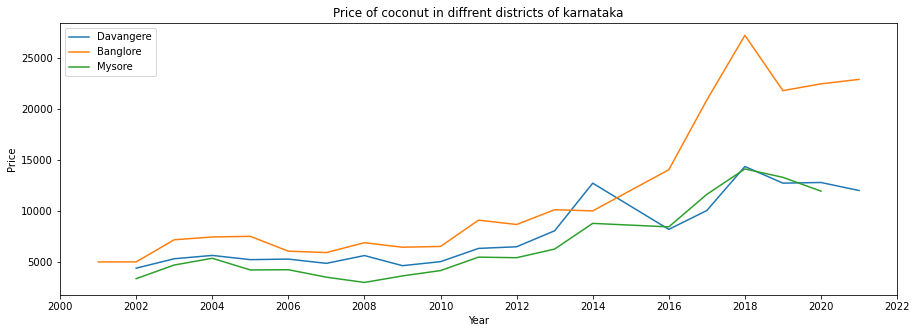

In [29]:
#Price of coconut in diffrent districts of karnataka
plt.figure(figsize=(15,5))
plt.plot(Davangere_Coconut.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Davangere');
plt.plot(Bangalore_Coconut.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Banglore');
plt.plot(Mysore_Coconut.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Mysore');
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(loc = 2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of coconut in diffrent districts of karnataka')
plt.show()

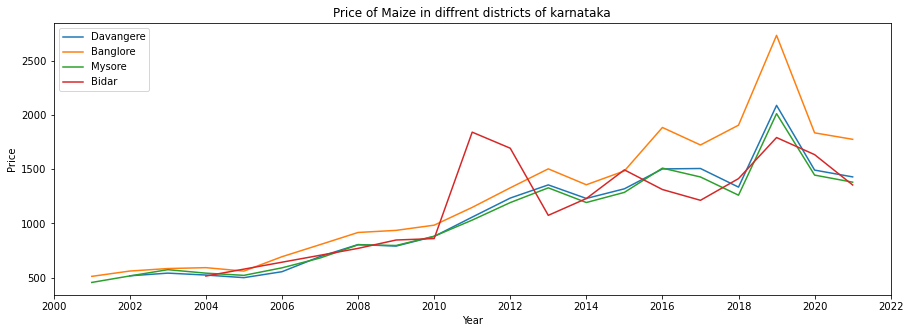

In [31]:
#Price of Maize in diffrent districts of karnataka
plt.figure(figsize=(15,5))
plt.plot(Davangere_Maize.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Davangere');
plt.plot(Bangalore_Maize.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Banglore');
plt.plot(Mysore_Maize.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Mysore');
plt.plot(Bidar_Maize.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Bidar');
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(loc = 2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Maize in diffrent districts of karnataka')
plt.show()

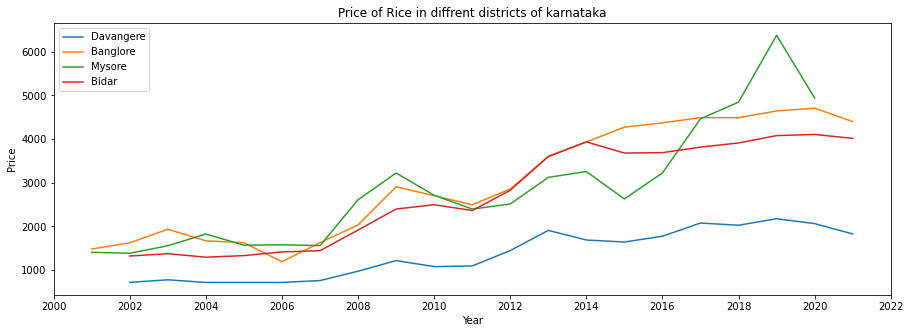

In [44]:
#Price of Rice in diffrent districts of karnataka
Davangere_Rice = pd.read_csv('Price_data_csvfiles/Davangere_Paddy(Dhan)(Common)')
plt.figure(figsize=(15,5))
plt.plot(Davangere_Rice.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Davangere');
plt.plot(Bangalore_Rice.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Banglore');
plt.plot(Mysore_Rice.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Mysore');
plt.plot(Bidar_Rice.groupby('year').mean()['Max Price (Rs./Quintal)'],label = 'Bidar');
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(loc = 2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Rice in diffrent districts of karnataka')
plt.show()